<a href="https://colab.research.google.com/github/AbubakarMA/Abu/blob/main/Electric_Vehicle_data_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report,mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor


In [10]:
df = pd.read_csv('/Electric_Vehicle_Population_Data.csv')

df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380.0,2023.0,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,35.0,240684006.0,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312.0,2018.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0,0.0,35.0,474183811.0,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJ3E1EA4L,King,Seattle,WA,98101.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,43.0,113120017.0,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP8E,King,Seattle,WA,98125.0,2014.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,108188713.0,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
4,1G1FX6S00H,Thurston,Yelm,WA,98597.0,2017.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,20.0,176448940.0,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC,5.306701e+10


In [11]:
df.info()

df.describe()

df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197125 entries, 0 to 197124
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         197125 non-null  object 
 1   County                                             197123 non-null  object 
 2   City                                               197122 non-null  object 
 3   State                                              197124 non-null  object 
 4   Postal Code                                        197122 non-null  float64
 5   Model Year                                         197124 non-null  float64
 6   Make                                               197124 non-null  object 
 7   Model                                              197123 non-null  object 
 8   Electric Vehicle Type                              197124 non-null  object

,0
VIN (1-10),0
County,2
City,3
State,1
Postal Code,3
Model Year,1
Make,1
Model,2
Electric Vehicle Type,1
Clean Alternative Fuel Vehicle (CAFV) Eligibility,1


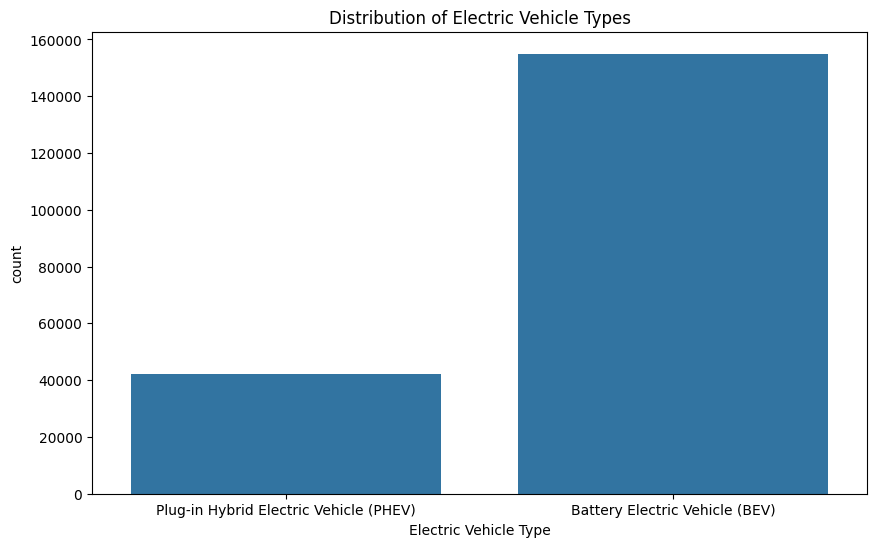

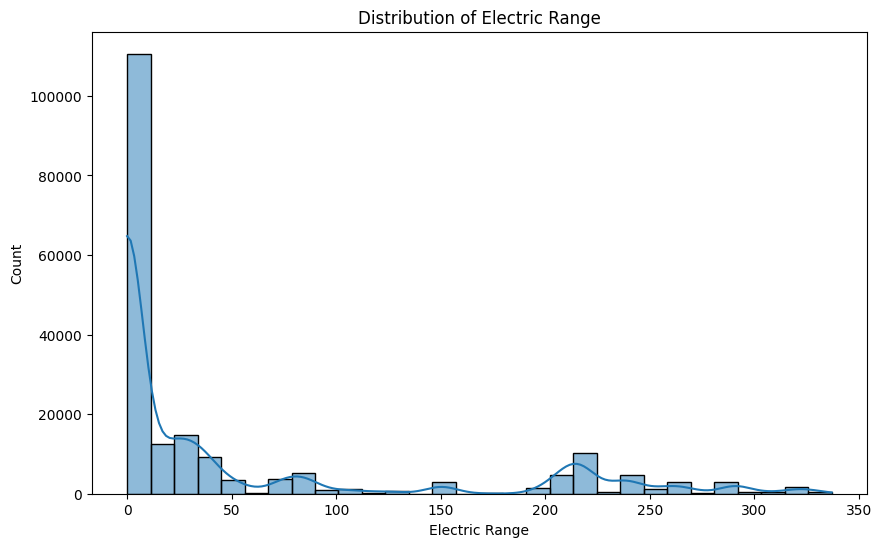

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Electric Vehicle Type')
plt.title('Distribution of Electric Vehicle Types')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Electric Range', bins=30, kde=True)
plt.title('Distribution of Electric Range')
plt.show()


In [13]:
df_encoded = pd.get_dummies(df, columns=['Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'])


In [11]:
df_encoded.drop(columns=['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Vehicle Location', 'Electric Utility'], inplace=True)


In [17]:
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df_encoded[column])
df_encoded.fillna(df_encoded.mean(), inplace=True)


In [18]:
x = df_encoded.drop(columns=['Model Year'])
y = df_encoded['Model Year']


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [20]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [23]:
#classifier = KNeighborsClassifier(n_neighbors=5)
#classifier.fit(x_train_scaled, y_train)

regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(x_train_scaled, y_train)

KNeighborsRegressor()

In [24]:
y_pred = regressor.predict(x_test_scaled)


In [29]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.6466719086873802
R-squared: 0.9272401762965093


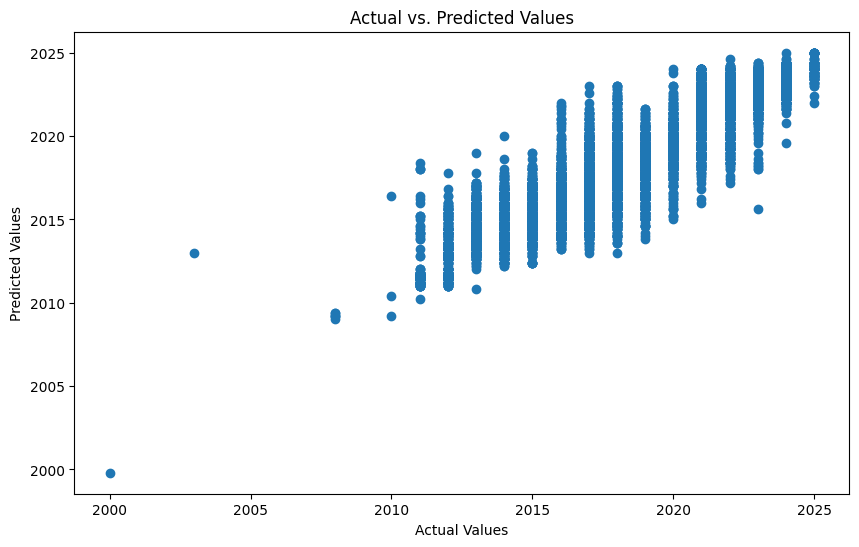

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()